In [3]:
from diffusion_policy.dataset.real_image_dataset import RealImageDataset

/home/tlips/.conda/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
dataset_path = "/home/tlips/Code/diffusion_policy/data/demo_place-cb-val"
import os 
os.path.exists(dataset_path)


True

In [11]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 224, 224],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 224, 224],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps, use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=False)

Replay buffer shape meta:
{'obs': {'camera_0': {'shape': [3, 224, 224], 'type': 'rgb'}, 'camera_1': {'shape': [3, 224, 224], 'type': 'rgb'}, 'robot_eef_pose_6d_rot': {'shape': [9], 'type': 'low_dim'}, 'gripper_width': {'shape': [1], 'type': 'low_dim'}}, 'action': {'shape': [10]}}
Acquiring lock on cache.
Cache does not exist. Creating!
Loading lowdim data


Loading image data: 100%|██████████| 1834/1834 [00:06<00:00, 305.32it/s]

Saving cache to disk.
image_keys: ['camera_0', 'camera_1']


In [12]:

dataset.replay_buffer

/
 ├── data
 │   ├── action (917, 10) float64
 │   ├── camera_0 (917, 224, 224, 3) uint8
 │   ├── camera_1 (917, 224, 224, 3) uint8
 │   ├── gripper_width (917, 1) float64
 │   └── robot_eef_pose_6d_rot (917, 9) float64
 └── meta
     └── episode_ends (7,) int64

In [7]:
dataset.get_validation_dataset().replay_buffer

image_keys: ['camera_0', 'camera_1']


/
 ├── data
 │   ├── action (37460, 10) float64
 │   ├── camera_0 (37460, 240, 320, 3) uint8
 │   ├── camera_1 (37460, 240, 320, 3) uint8
 │   ├── gripper_width (37460, 1) float64
 │   └── robot_eef_pose_6d_rot (37460, 9) float64
 └── meta
     └── episode_ends (300,) int64

In [11]:
print(list(dataset.replay_buffer.meta["episode_ends"]))

[116, 219, 341, 469, 594, 688, 815, 937, 1095, 1235, 1343, 1463, 1560, 1688, 1835, 1975, 2103, 2251, 2363, 2466, 2585, 2780, 2862, 2985, 3082, 3198, 3338, 3478, 3635, 3729, 3883, 4023, 4170, 4293, 4411, 4541, 4680, 4829, 4962, 5157, 5296, 5445, 5557, 5693, 5812, 5920, 6016, 6170, 6304, 6420, 6565, 6705, 6871, 7024, 7171, 7299, 7432, 7573, 7717, 7808, 7911, 8040, 8216, 8371, 8521, 8657, 8804, 8939, 9047, 9174, 9317, 9466, 9609, 9747, 9926, 10071, 10203, 10374, 10463, 10566, 10668, 10775, 10900, 11025, 11122, 11247, 11379, 11534, 11663, 11778, 11939, 12078, 12231, 12385, 12484, 12622, 12745, 12879, 13038, 13137, 13263, 13388, 13527, 13642, 13744, 13856, 13982, 14125, 14232, 14344, 14447, 14559, 14661, 14746, 14847, 14940, 15048, 15152, 15280, 15395, 15501, 15597, 15705, 15790, 15879, 15976, 16104, 16222, 16315, 16408, 16491, 16664, 16808, 16931, 17028, 17101, 17227, 17325, 17438, 17553, 17655, 17788, 17891, 18036, 18199, 18347, 18489, 18631, 18736, 18851, 18976, 19105, 19240, 19377, 1953

Episode 0
[ 0.04177127 -0.35023977  0.28691355  0.94958241  0.11378902  0.29213919
  0.06775531 -0.98427325  0.16314221]


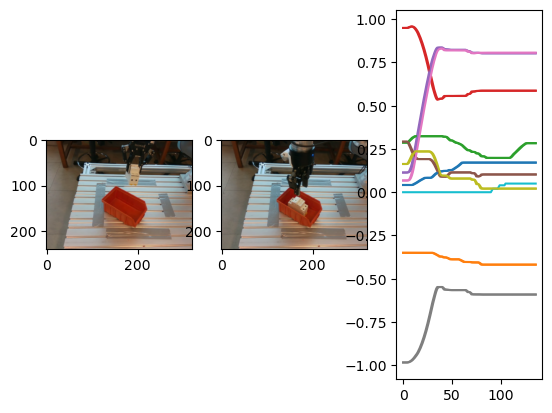

In [7]:
buffer = dataset.replay_buffer
for episode_idx in range(0,len(buffer.meta.episode_ends),10):
    print(f"Episode {episode_idx}")
    episode = buffer.get_episode(episode_idx)
    # get all images "camera_0 from the episode
    images = episode["camera_0"]
    # show first image and last image
    import matplotlib.pyplot as plt
    # side by side
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(images[0])
    ax[1].imshow(images[-1])
    # display state and action 
    actions = episode["action"]
    eef_pose = episode["robot_eef_pose_6d_rot"]
    print(eef_pose[0])
    ax[2].plot(actions)
    ax[2].plot(eef_pose)
    plt.show()



(137, 9)
(137, 10)
(137, 1)


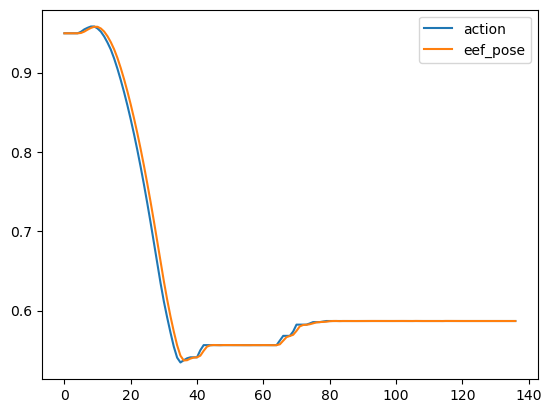

In [8]:
# detailed plot of observations vs actions
import numpy as np
import matplotlib.pyplot as plt
buffer = dataset.replay_buffer
episode_idx = 0
episode = buffer.get_episode(episode_idx)
actions = episode["action"]
eef_pose = episode["robot_eef_pose_6d_rot"]
print(eef_pose.shape)
print(actions.shape)
g = episode["gripper_width"]
# add new dim 
print(g.shape)
plt.plot(actions[:, 3])
plt.plot(eef_pose[:, 3])
plt.legend(["action", "eef_pose"])
